<a href="https://colab.research.google.com/github/NithishaRaghavaraju/ML/blob/Classification/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import os
import tarfile
import urllib

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [109]:
# Importing data from Git Hub
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/NithishaRaghavaraju/ML/main/"
PATH = os.path.join("Cancer")
URL = DOWNLOAD_ROOT + "Classification/data.csv"

In [110]:
CancerData_url=URL
CancerData_path=PATH
os.makedirs(CancerData_path, exist_ok=True)
path = os.path.join(CancerData_path, "CancerData.csv")
urllib.request.urlretrieve(CancerData_url, path)

('Cancer/CancerData.csv', <http.client.HTTPMessage at 0x7c464021e5f0>)

In [111]:
#Loading the data set
import pandas as pd
def load_dataset(path=CancerData_path):
  path = os.path.join(path,"CancerData.csv")
  return pd.read_csv(path)

In [112]:
dataset = load_dataset()
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
dataset["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [114]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [115]:
benign_count = (dataset["diagnosis"] == 'B').sum()
malignant_count = (dataset["diagnosis"] == 'M').sum()

# Determine the minimum count between the two classes
min_count = min(benign_count, malignant_count)

# Sample an equal number of samples from each class
benign_samples = dataset[dataset["diagnosis"] == 'B'].sample(n=min_count, random_state=42)
malignant_samples = dataset[dataset["diagnosis"] == 'M'].sample(n=min_count, random_state=42)

# Combine the sampled data from both classes
balanced_df = pd.concat([benign_samples, malignant_samples])

In [116]:
balanced_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
395,903811,B,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,...,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,NaN
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,...,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468,NaN
481,91227,B,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,...,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,NaN
493,914101,B,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,...,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,NaN
136,868223,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,...,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.09176,...,41.85,128.50,1153.0,0.22260,0.52090,0.46460,0.20130,0.4432,0.10860,NaN
14,84667401,M,13.730,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.08025,...,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310,NaN
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.18780,...,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082,NaN
433,908445,M,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.08744,...,30.93,145.30,1603.0,0.13900,0.34630,0.39120,0.17080,0.3007,0.08314,NaN


In [117]:
balanced_df["diagnosis"].value_counts()

B    212
M    212
Name: diagnosis, dtype: int64

In [118]:
X = balanced_df.drop(["diagnosis","id"],axis=1)
X = X.iloc[:,:-1]
Y = balanced_df["diagnosis"]

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [120]:
Y_train = (Y_train=="M")
Y_test = (Y_test=="M")
#where True indicates "M" and False indicates "B".

In [121]:
#Apply feature scaling now to numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
attribs = list(X_train)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, attribs),
 ])
X_train = full_pipeline.fit_transform(X_train)

##Logistic Regression

In [122]:
Y_train.value_counts()

True     173
False    166
Name: diagnosis, dtype: int64

In [123]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(X_train,Y_train)

LogisticRegression()

In [124]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(LR_clf, X_train, Y_train, cv=3)

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)

array([[163,   3],
       [  8, 165]])

In [126]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train, y_train_pred)

0.9821428571428571

In [127]:
recall_score(Y_train, y_train_pred)

0.953757225433526

In [128]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.9677419354838709

In [129]:
y_scores = cross_val_predict(LR_clf, X_train, Y_train, cv=3,method="decision_function")
y_scores_dec = [float("{:.5f}".format(score)) for score in y_scores]

In [130]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores_dec)

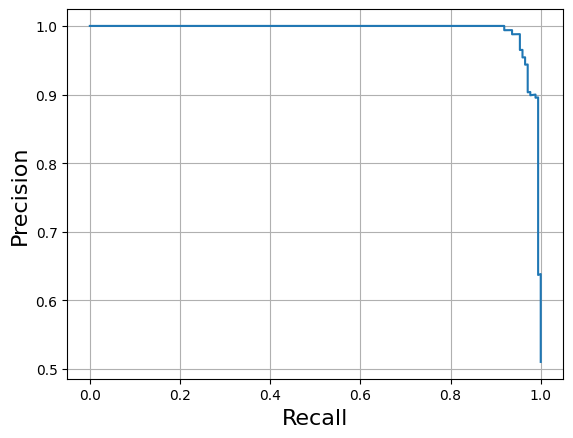

In [131]:
plt.plot(recalls,precisions)
plt.ylabel("Precision", fontsize=16)
plt.xlabel("Recall", fontsize=16)
plt.grid(True)
plt.show()

In [132]:
threshold_80_precision = thresholds[np.argmax(precisions >= 0.80)]
y_train_pred_80 = (y_scores >= threshold_80_precision)

In [133]:
threshold_80_precision

-2.92903

In [134]:
precision_score(Y_train, y_train_pred_80)

0.8037383177570093

In [135]:
recall_score(Y_train, y_train_pred_80)

0.9942196531791907

In [136]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

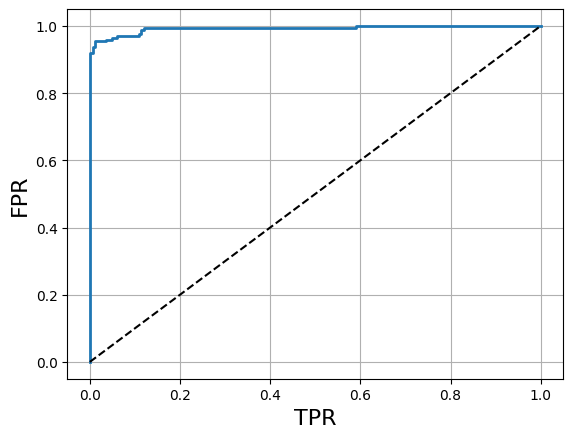

In [137]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.grid(True)
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plot_roc_curve(fpr, tpr)
plt.ylabel("FPR", fontsize=16)
plt.xlabel("TPR", fontsize=16)
plt.show()

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, y_scores)

0.9927919771571836

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred_80)

array([[124,  42],
       [  1, 172]])

##SVM(Support Vector Machines)

In [140]:
from sklearn.svm import SVC
SVC_clf = SVC()
SVC_clf.fit(X_train,Y_train)

SVC()

In [141]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVC_clf, X_train, Y_train, cv=3)

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)

array([[158,   8],
       [  7, 166]])

In [143]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train, y_train_pred)

0.9540229885057471

In [144]:
recall_score(Y_train, y_train_pred)

0.9595375722543352

In [145]:
y_scores = cross_val_predict(SVC_clf, X_train, Y_train, cv=3,method="decision_function")
y_scores_dec = [float("{:.5f}".format(score)) for score in y_scores]

In [146]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores_dec)

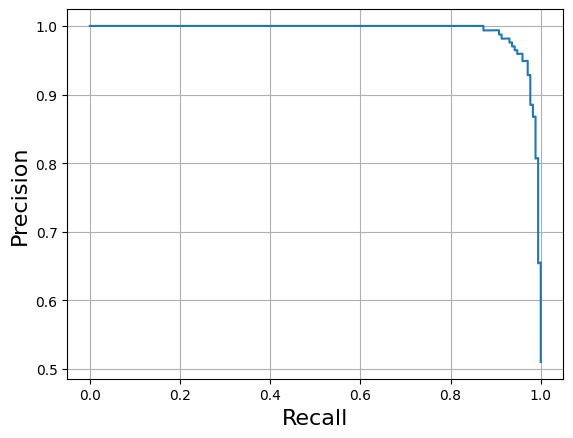

In [147]:
plt.plot(recalls,precisions)
plt.ylabel("Precision", fontsize=16)
plt.xlabel("Recall", fontsize=16)
plt.grid(True)
plt.show()

In [148]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

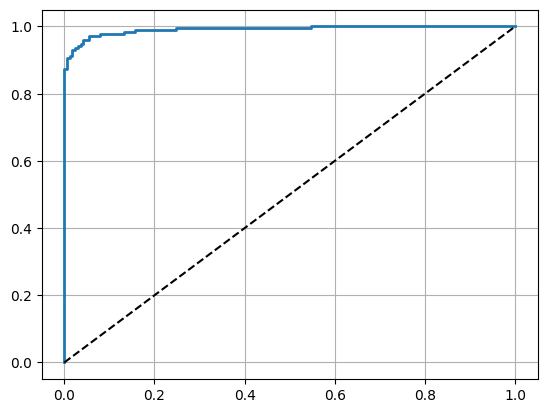

In [149]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.grid(True)
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plot_roc_curve(fpr, tpr)

plt.show()

In [150]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, y_scores)

0.9910509088376628

##Testing the data

In [151]:
X_test= full_pipeline.transform(X_test)

In [152]:
X_test

array([[-0.71233414, -0.92864139, -0.73261516, ..., -1.1813182 ,
        -0.73656393, -1.16647799],
       [ 0.30938481, -0.46277293,  0.35460443, ...,  0.8320587 ,
         2.09681152,  2.01275873],
       [-1.19518305, -0.13101813, -1.17336943, ..., -1.41607868,
        -0.19144024, -0.50888686],
       ...,
       [-1.31256069, -0.54512342, -1.28915427, ..., -0.93607215,
        -0.08368324, -0.44977755],
       [-0.40021634, -1.36156964, -0.40494408, ...,  0.06165987,
         0.44400917,  0.42736246],
       [-1.02445195,  0.61013623, -1.01590206, ..., -0.94859659,
         0.35209878, -0.25556123]])

In [153]:
Y_test = np.array(Y_test)

In [154]:
LR_predictions = LR_clf.predict(X_test)

In [155]:
Y_test

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True, False, False, False])

In [156]:
LR_predictions

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False])

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, LR_predictions)

array([[44,  2],
       [ 2, 37]])

In [158]:
SVC_predictions = SVC_clf.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, SVC_predictions)

array([[45,  1],
       [ 1, 38]])